In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("Zoo.csv")
data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


## Data Preprocessing

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [4]:
data.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [5]:
data.duplicated().sum()

0

In [6]:
data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [7]:
data.agg(["var","median","skew","kurtosis"])

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
var,0.246931,0.160396,0.245347,0.243564,0.182970,0.231683,0.249505,0.241584,0.147921,0.166337,0.073663,0.141386,4.134653,0.193069,0.113267,0.248317,4.421386
median,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
skew,0.304908,1.538501,-0.346676,0.388876,1.251556,0.608577,-0.222443,-0.431569,-1.707118,-1.461244,3.163428,1.799849,0.139427,-1.126430,2.250991,0.263515,0.852362
kurtosis,-1.945969,0.373997,-1.918204,-1.886536,-0.442773,-1.662967,-1.990336,-1.850801,0.932321,0.137564,8.168668,1.264099,-0.598630,-0.746333,3.128527,-1.969973,-0.697422


In [8]:
data["animal name"].value_counts()

frog        2
vampire     1
tuna        1
sealion     1
goat        1
           ..
starfish    1
clam        1
ladybird    1
hamster     1
calf        1
Name: animal name, Length: 100, dtype: int64

In [9]:
data["animal name"].unique()

array(['aardvark', 'antelope', 'bass', 'bear', 'boar', 'buffalo', 'calf',
       'carp', 'catfish', 'cavy', 'cheetah', 'chicken', 'chub', 'clam',
       'crab', 'crayfish', 'crow', 'deer', 'dogfish', 'dolphin', 'dove',
       'duck', 'elephant', 'flamingo', 'flea', 'frog', 'fruitbat',
       'giraffe', 'girl', 'gnat', 'goat', 'gorilla', 'gull', 'haddock',
       'hamster', 'hare', 'hawk', 'herring', 'honeybee', 'housefly',
       'kiwi', 'ladybird', 'lark', 'leopard', 'lion', 'lobster', 'lynx',
       'mink', 'mole', 'mongoose', 'moth', 'newt', 'octopus', 'opossum',
       'oryx', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'pike',
       'piranha', 'pitviper', 'platypus', 'polecat', 'pony', 'porpoise',
       'puma', 'pussycat', 'raccoon', 'reindeer', 'rhea', 'scorpion',
       'seahorse', 'seal', 'sealion', 'seasnake', 'seawasp', 'skimmer',
       'skua', 'slowworm', 'slug', 'sole', 'sparrow', 'squirrel',
       'starfish', 'stingray', 'swan', 'termite', 'toad', 'tortoise',
       

In [10]:
data["animal name"].mode()

0    frog
dtype: object

## EDA

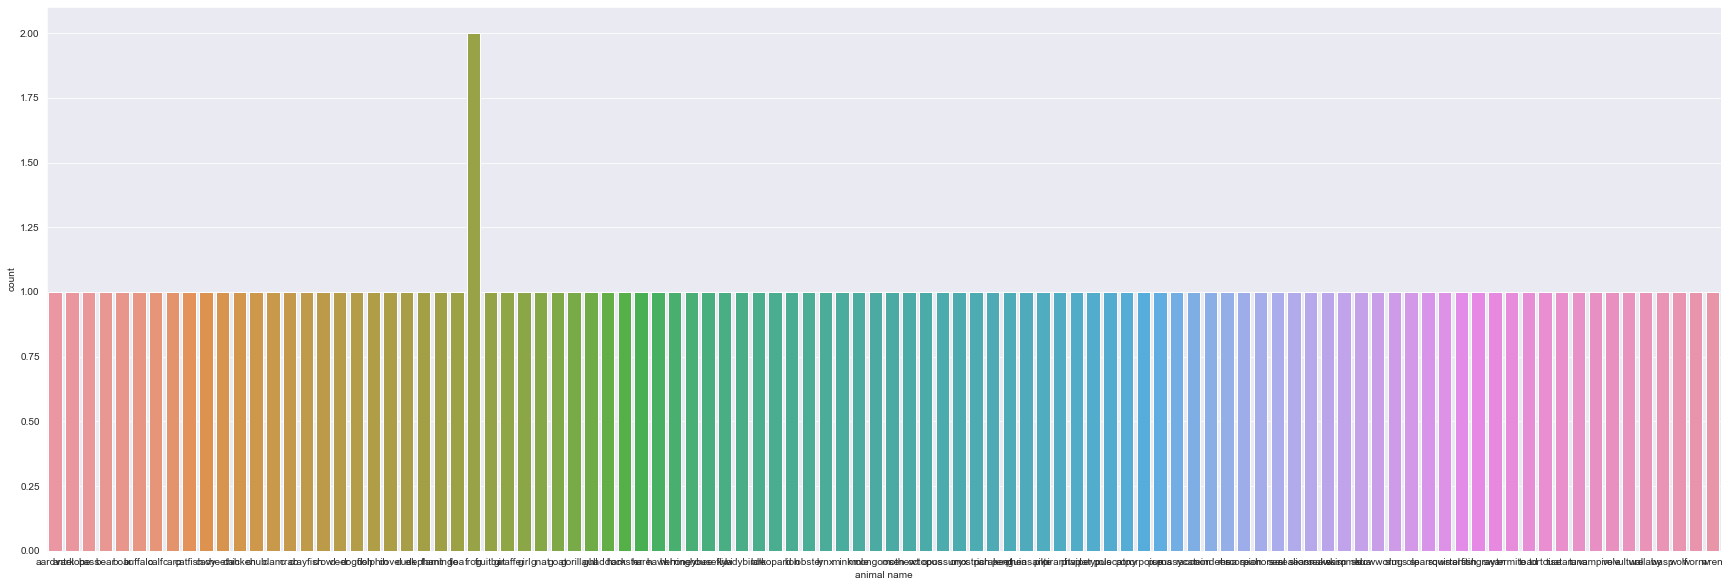

In [11]:
sns.set_style("darkgrid")
plt.figure(figsize = (30,10))
sns.countplot(data["animal name"])
plt.show()

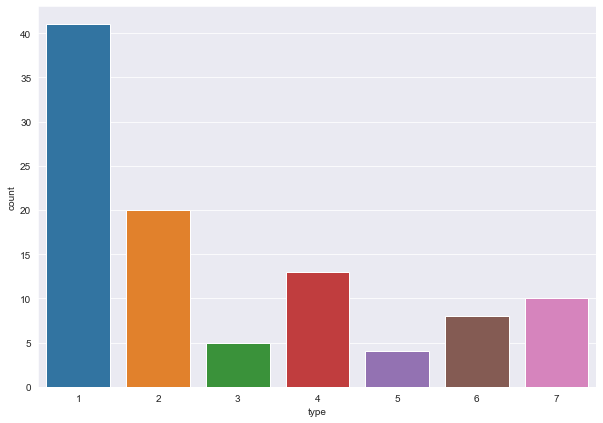

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [12]:
sns.set_style("darkgrid")
plt.figure(figsize = (10,7))
sns.countplot(data["type"])
plt.show()

data["type"].value_counts()

## Data Preparation

In [13]:
X = data.iloc[:,1:17]
y = data.iloc[:,17:]

In [17]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=10)

## KNN model

In [18]:
model = KNeighborsClassifier(n_neighbors = 11)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [19]:
y_pred = model.predict(X_test)
y_pred

array([2, 1, 6, 6, 4, 1, 4, 4, 1, 5, 2, 4, 1, 6, 4, 1, 1, 2, 1, 4, 4],
      dtype=int64)

In [20]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [22]:
round(accuracy_score(y_pred,y_test))

1

In [23]:
confusion_matrix(y_test,y_pred)

array([[5, 0, 0, 2, 0, 0, 0],
       [0, 3, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 4, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 1, 1, 1, 0]], dtype=int64)

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.71      0.71      0.71         7
           2       1.00      1.00      1.00         3
           3       0.00      0.00      0.00         1
           4       0.57      1.00      0.73         4
           5       0.00      0.00      0.00         1
           6       0.67      1.00      0.80         2
           7       0.00      0.00      0.00         3

    accuracy                           0.67        21
   macro avg       0.42      0.53      0.46        21
weighted avg       0.55      0.67      0.60        21



## Grid Serach Algorithm for model tuning

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors = n_neighbors)

In [28]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator = model, param_grid = param_grid)
grid.fit(X,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [29]:
print(grid.best_score_)
print(grid.best_params_)

0.97
{'n_neighbors': 1}


## Visulaizing the CV results

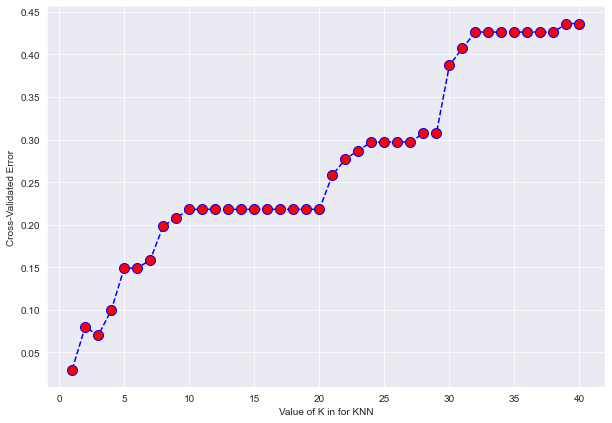

In [30]:
#choose k between 1 t0 41
k_range = range(1,41)
k_scores = []
#use iteration to calculator different k in models, then return the average accuracy based on the cross_val_score
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn,X,y,cv = 5)
    k_scores.append(1-scores.mean())
#plot to see clearly
plt.figure(figsize = (10,7))
plt.plot(k_range,k_scores,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.xlabel("Value of K in for KNN")
plt.ylabel("Cross-Validated Error")
plt.show()